In [16]:
from main_SMNN import *
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
X,y = make_moons(n_samples=100, noise=0.05, random_state=0)

X_centered = X-X.mean()
X_scaled = (X_centered-X_centered.min())/(X_centered.max()-X_centered.min())

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

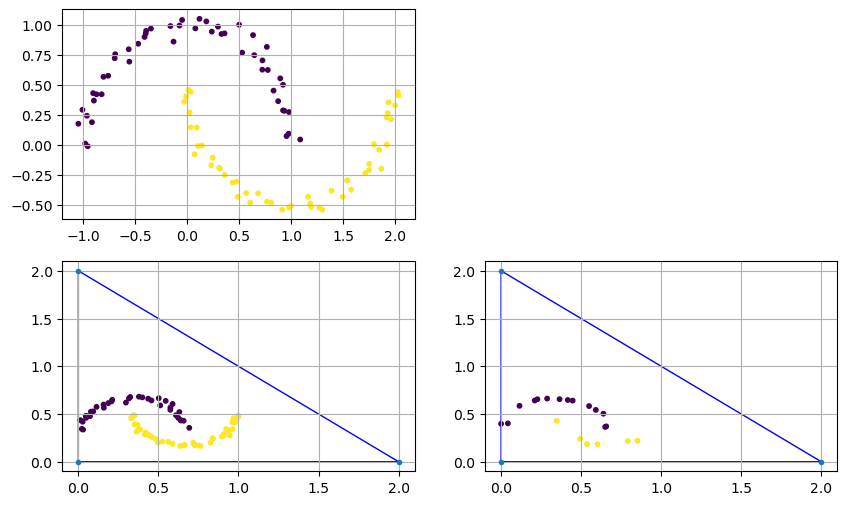

In [18]:
plt.rcParams["figure.figsize"] = (10,6)
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.grid()
plt.subplot(2,2,3)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10)
plt.grid()
plt.subplot(2,2,4)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s=10)
plt.grid()

In [19]:
bar_iterations=3
dim=2
dic_sups = dic_supports(supports(bar_iterations,dim))
sups = supports(bar_iterations,dim)
data = X_train
d=itek_barycentrics(data,bar_iterations)
bis = [bis_cons(d,ite,dim) for ite in range(bar_iterations+1)]

Training neural network...
3/3 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8375
[0.40260034799575806, 0.8374999761581421]
Training neural network...
3/3 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8875
[0.24084477126598358, 0.887499988079071]
Training neural network...
3/3 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 1.0000
[0.03514188528060913, 1.0]
Training neural network...
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
[0.0012779509415850043, 1.0]


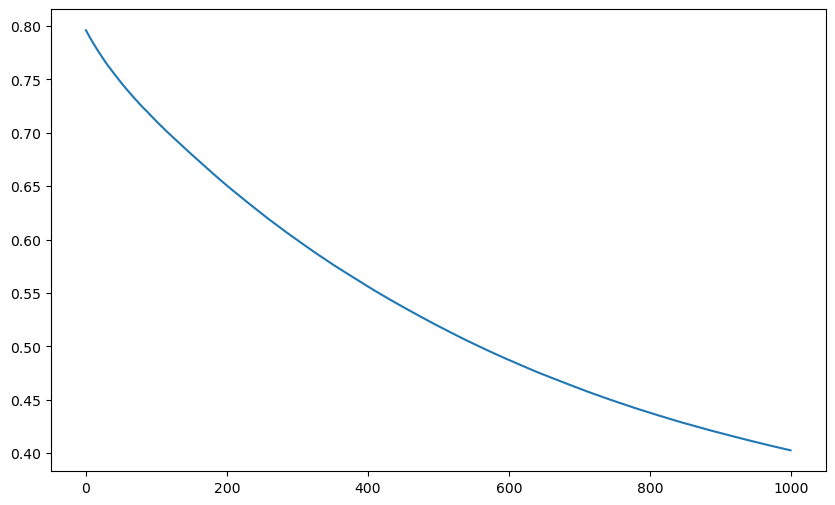

In [20]:
n_samples = len(X_train)

n_classes = len(set(y_train))
y_hot=tf.one_hot(y_train,depth=n_classes)
y_hot=np.array(y_hot)


verbose = False
epochs = 1000
model0,history0=SMNN(bis[0],y_train,epochs,verbose =verbose)
print(model0.evaluate(bis[0],y_hot))
plt.plot(history0.history['loss'])
#plt.show()
vsi = [bis_cons(itek_barycentrics(sups[i],i),i,dim) for i in range(bar_iterations)]
vs0 = np.matmul(vsi[0],model0.get_weights())
weights0=vs0 #np.matmul(P(2),model0.get_weights())#vs0


model1,history1=SMNN(bis[1],y_train,epochs,weights0,verbose =verbose)
print(model1.evaluate(bis[1],y_hot))

#plt.show()
vs1=np.matmul(vsi[1],model1.get_weights())
weights1=vs1

model2,history2=SMNN(bis[2],y_train,epochs,weights1,verbose =verbose)
print(model2.evaluate(bis[2],y_hot))

vs2=np.matmul(vsi[2],model2.get_weights())
weights2=vs2

model3,history3=SMNN(bis[3],y_train,epochs,weights2,verbose =verbose)
print(model3.evaluate(bis[3],y_hot))


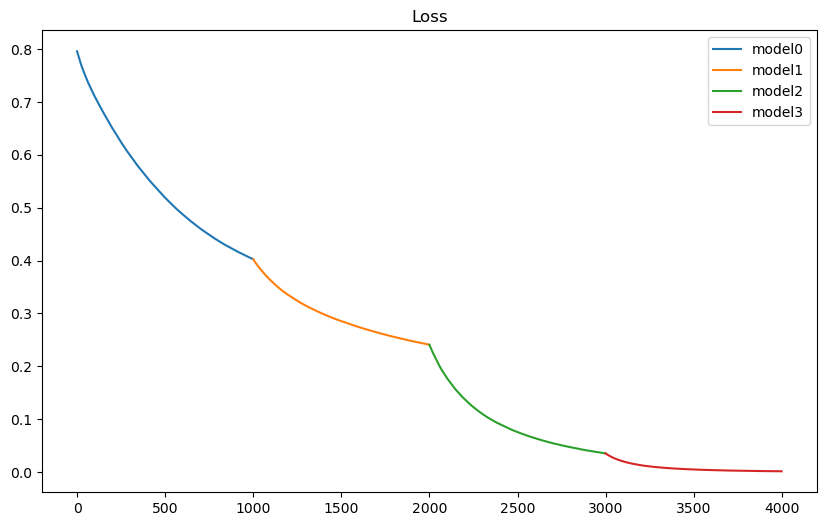

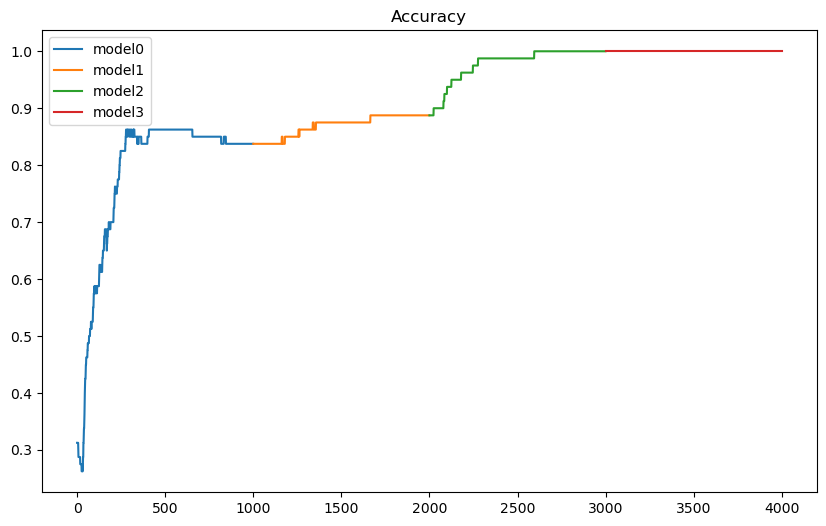

In [21]:
plt.plot(history0.history['loss'])
plt.plot(range(epochs,2*epochs),history1.history['loss'])
plt.plot(range(2*epochs,3*epochs),history2.history['loss'])
plt.plot(range(3*epochs,4*epochs),history3.history['loss'])
plt.legend(["model0","model1","model2","model3"])
plt.title("Loss")
plt.show()


plt.plot(history0.history['accuracy'])
plt.plot(range(epochs,2*epochs),history1.history['accuracy'])
plt.plot(range(2*epochs,3*epochs),history2.history['accuracy'])
plt.plot(range(3*epochs,4*epochs),history3.history['accuracy'])
plt.legend(["model0","model1","model2","model3"])
plt.title("Accuracy")
plt.show()


In [22]:
n_classes = len(set(y_train))
y_hot=tf.one_hot(y_train,depth=n_classes)
y_hot=np.array(y_hot)
data = X_test
d_test=itek_barycentrics(data,bar_iterations)
bis_test = [bis_cons(d_test,ite,dim) for ite in range(bar_iterations+1)]
yt_hot=tf.one_hot(y_test,depth=n_classes)
yt_hot=np.array(yt_hot)
print("Evaluation on test")
print("Model 0")
model0.evaluate(bis_test[0],yt_hot)
print("Model 1")
model1.evaluate(bis_test[1],yt_hot)
print("Model 2")
model2.evaluate(bis_test[2],yt_hot)
print("Model 3")
model3.evaluate(bis_test[3],yt_hot)

Evaluation on test
Model 0
1/1 [==============================] - 0s 20ms/step - loss: 0.4494 - accuracy: 0.8000
Model 1
1/1 [==============================] - 0s 22ms/step - loss: 0.2892 - accuracy: 0.8500
Model 2
1/1 [==============================] - 0s 20ms/step - loss: 0.0516 - accuracy: 1.0000
Model 3
1/1 [==============================] - 0s 20ms/step - loss: 0.0070 - accuracy: 1.0000


[0.0069633834064006805, 1.0]

In [23]:
predicted_labels_0=[np.argmax(x) for x in model0.predict(bis[0])]
predicted_labels_1=[np.argmax(x) for x in model1.predict(bis[1])]
predicted_labels_2=[np.argmax(x) for x in model2.predict(bis[2])]
predicted_labels_3=[np.argmax(x) for x in model3.predict(bis[3])]

3/3 [==============================] - 0s 1ms/step


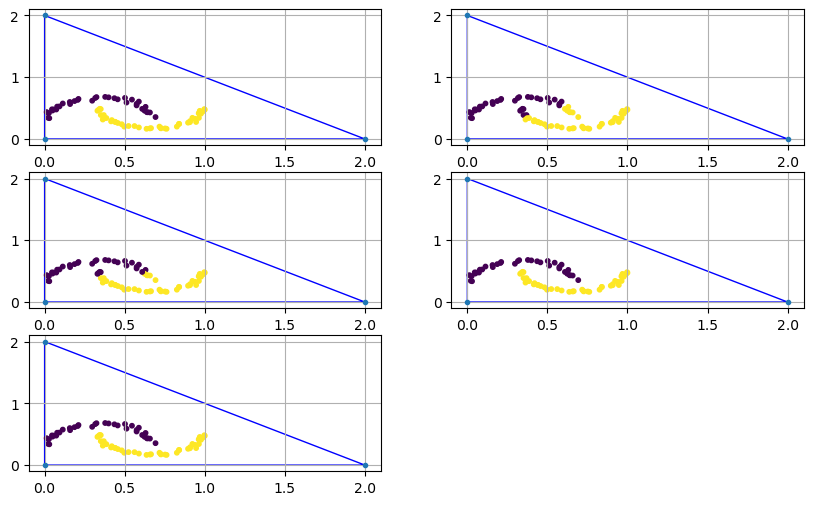

In [24]:
plt.rcParams["figure.figsize"] = (10,6)
plt.subplot(3,2,1)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10)
plt.grid()
plt.subplot(3,2,2)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=predicted_labels_0,s=10)
plt.grid()
plt.subplot(3,2,3)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=predicted_labels_1,s=10)
plt.grid()
plt.subplot(3,2,4)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=predicted_labels_2,s=10)
plt.grid()
plt.subplot(3,2,5)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=predicted_labels_3,s=10)
plt.grid()


In [25]:
xs = np.linspace(0,2,500)
grid = []
for x in xs:
    for y in xs:
        if x+y<2:
            grid.append([x,y])
d_grid=itek_barycentrics(grid,bar_iterations)
bis_grid = [bis_cons(d_grid,ite,dim) for ite in range(bar_iterations+1)]

In [ ]:
predicted_labels_0=[np.argmax(x) for x in model0.predict(bis_grid[0])]
predicted_labels_1=[np.argmax(x) for x in model1.predict(bis_grid[1])]
predicted_labels_2=[np.argmax(x) for x in model2.predict(bis_grid[2])]
predicted_labels_3=[np.argmax(x) for x in model3.predict(bis_grid[3])]

 360/3908 [=>............................] - ETA: 2s

In [ ]:
grid = np.array(grid)
plt.rcParams["figure.figsize"] = (10,6)
plt.subplot(3,2,1)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10)
plt.grid()
plt.subplot(3,2,2)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_0,s=1)
plt.grid()
plt.subplot(3,2,3)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_1,s=1)
plt.grid()
plt.subplot(3,2,4)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_2,s=1)
plt.grid()
plt.subplot(3,2,5)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_3,s=1)
plt.grid()
